# Model training 

## outline:

- [**01. Importing libraries**](#01)
- [**02. Load DataSet**](#02)
- [**03. load pre_selected features**](#03)
- [**04. Modeling and evaluation**](#04)
- [**05. Feature importance**](#05)

---

<a id="01"></a>

### **01. Importing libraries** 


---



In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


# to save model 
import joblib

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
# display all columns 
pd.pandas.set_option('display.max_columns',None)


---

<a id="02"></a>

### **02. Load DataSet** 


---



In [13]:
X_train = pd.read_csv('Data/CleanedData/xtrain.csv')
X_test = pd.read_csv('Data/CleanedData/xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,0.750000,0.75,0.321429,0.358615,0.333333,1.000000,0.0,0.863636,0.4,0.75,0.6,0.777778,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.000000,0.666667,1.0,0.666667,0.666667,0.666667,1.0,0.146757,0.825429,0.347048,1.0,1.00,1.0,1.0,0.585326,0.0,0.521003,0.000000,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.75,0.018692,1.0,0.75,0.503432,0.5,0.5,1.0,0.738563,0.457777,0.0,0.0,0.0,0.0,0.666667,0.75
1,0.750000,0.75,0.316824,0.380598,0.333333,0.333333,0.0,0.363636,0.4,0.75,0.6,0.444444,0.360294,0.049180,0.0,0.0,0.6,0.5,0.666667,0.739293,0.666667,0.5,0.333333,0.666667,0.000000,0.8,0.583073,0.343417,0.271419,1.0,1.00,1.0,1.0,0.460219,0.0,0.403993,0.333333,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.75,0.457944,0.5,0.25,0.291435,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.666667,0.75
2,0.916667,0.75,0.263578,0.329323,0.000000,0.333333,0.0,0.954545,0.4,1.00,0.6,0.888889,0.036765,0.098361,1.0,0.0,0.4,0.3,0.666667,0.918887,1.000000,1.0,1.000000,0.666667,0.000000,1.0,0.492331,0.781495,0.396136,1.0,1.00,1.0,1.0,0.651365,0.0,0.584125,0.333333,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.75,0.046729,0.5,0.50,0.480457,0.5,0.5,1.0,0.824968,0.692969,0.0,0.0,0.0,0.0,0.666667,0.75
3,0.750000,0.75,0.307738,0.473952,0.666667,0.666667,0.0,0.454545,0.4,0.75,0.6,0.666667,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.000000,0.666667,1.0,0.666667,0.666667,1.000000,1.0,0.688983,0.129421,0.349856,1.0,1.00,1.0,1.0,0.592381,0.0,0.527700,0.333333,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.75,0.084112,0.5,0.50,0.437886,0.5,0.5,1.0,0.912638,0.507473,0.0,0.0,0.0,0.0,0.666667,0.75
4,0.750000,0.75,0.434355,0.383803,0.333333,0.333333,0.0,0.363636,0.4,0.75,0.6,0.555556,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.888552,0.333333,0.5,0.333333,0.666667,0.000000,0.6,0.503143,0.666204,0.339815,1.0,0.75,1.0,1.0,0.574729,0.0,0.510963,0.000000,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.75,0.411215,0.5,0.50,0.480457,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.666667,0.75


In [14]:
y_train = pd.read_csv('Data/CleanedData/ytrain.csv')
y_test = pd.read_csv('Data/CleanedData/ytest.csv')

---

<a id="03"></a>

### **03. load pre_selected features** 


---



In [15]:
features = pd.read_csv('SelectedFeatures\selected_features.csv')
features = features['0'].tolist()
for i,feature in enumerate(features, start=1):
    print(f"feature {i} : {feature}")

feature 1 : MSSubClass
feature 2 : MSZoning
feature 3 : LotArea
feature 4 : LotShape
feature 5 : LandContour
feature 6 : LotConfig
feature 7 : Neighborhood
feature 8 : Condition1
feature 9 : HouseStyle
feature 10 : OverallQual
feature 11 : YearRemodAdd
feature 12 : RoofStyle
feature 13 : Exterior1st
feature 14 : ExterQual
feature 15 : Foundation
feature 16 : BsmtQual
feature 17 : BsmtCond
feature 18 : BsmtExposure
feature 19 : BsmtFinType1
feature 20 : BsmtFinSF1
feature 21 : BsmtUnfSF
feature 22 : HeatingQC
feature 23 : CentralAir
feature 24 : 1stFlrSF
feature 25 : GrLivArea
feature 26 : BsmtFullBath
feature 27 : HalfBath
feature 28 : KitchenQual
feature 29 : TotRmsAbvGrd
feature 30 : Functional
feature 31 : Fireplaces
feature 32 : GarageYrBlt
feature 33 : GarageFinish
feature 34 : GarageCars
feature 35 : GarageArea
feature 36 : PavedDrive
feature 37 : WoodDeckSF
feature 38 : OpenPorchSF
feature 39 : ScreenPorch
feature 40 : SaleCondition


In [16]:
print(X_train.shape)
print(X_test.shape)

(1314, 61)
(146, 61)


In [17]:
X_train = X_train[features]
X_test = X_test[features]

In [18]:
print(X_train.shape)
print(X_test.shape)

(1314, 40)
(146, 40)


---

<a id="04"></a>

### **04. Modeling and evaluation** 


---



In [19]:
# modeling 
lin_model = Lasso(alpha=0.001, random_state=42)

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [20]:
# evaluate the model:
#====================

# remember that we log transformed the output (SalePrice)

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2


# 1. make the prediction for the train dataset 
pred = lin_model.predict(X_train)

# 2. mse, rmse and r2 score
print(f"train mse: {int(mean_squared_error(np.exp(y_train), np.exp(pred)))}")
print(f"train r2: {r2_score(np.exp(y_train), np.exp(pred))}")
print()

# 3. make predictions for test set
pred = lin_model.predict(X_test)

# 4. mse, rmse and r2 score
print(f"Test mse: {int(mean_squared_error(np.exp(y_test), np.exp(pred)))}")
print(f"Test r2: {r2_score(np.exp(y_test), np.exp(pred))}")
print()


train mse: 827720454
train r2: 0.8674338977809419

Test mse: 1055768048
Test r2: 0.8463692758150021



Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

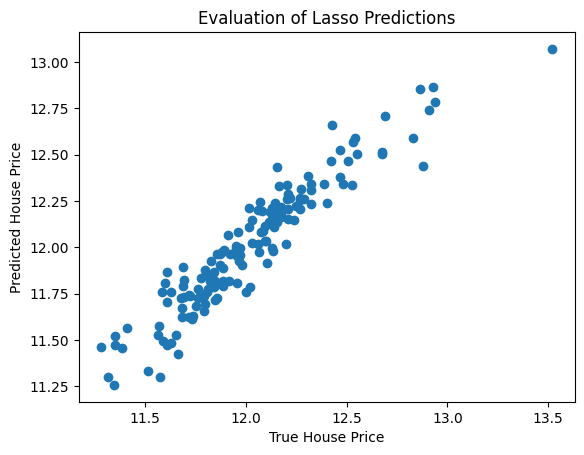

In [21]:
# let's evaluate our predictions respect to the real sale price

plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

---

<a id="05"></a>

### **05. Feature Importance** 


---



Text(0.5, 1.0, 'Feature Importance')

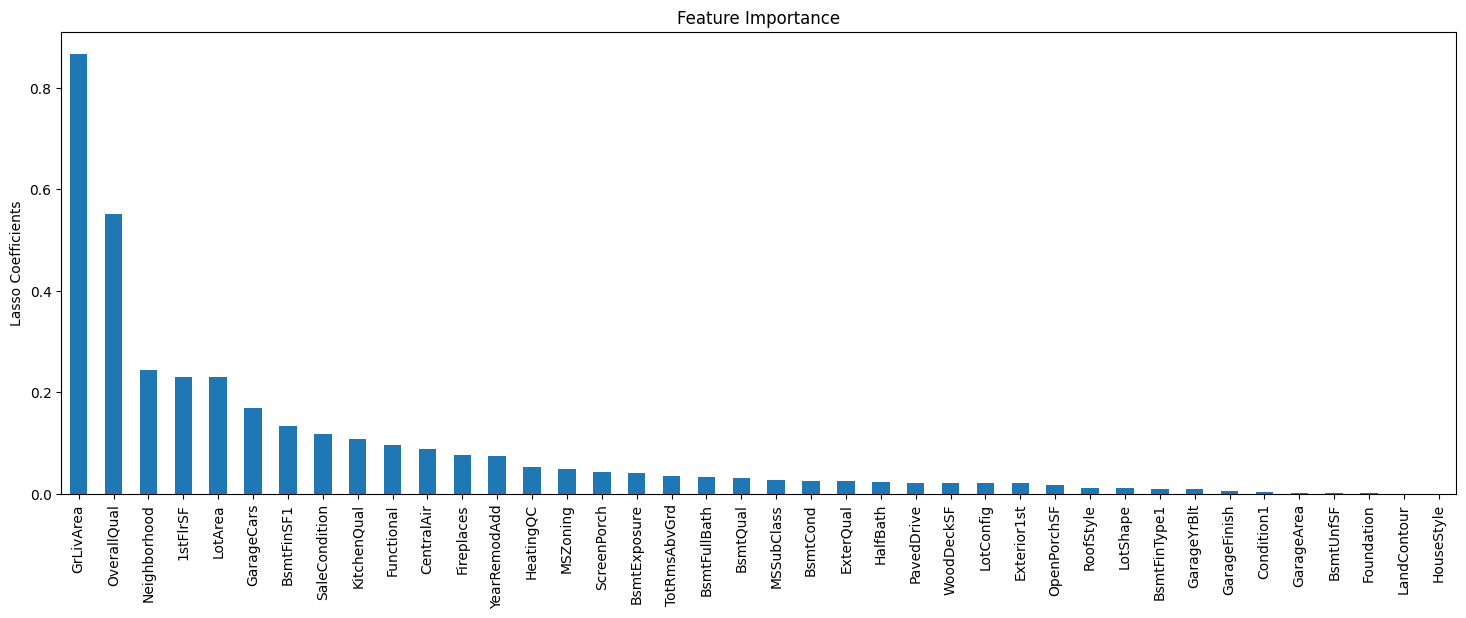

In [22]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

---

<a id="06"></a>

### **06. Save The Model** 


---



In [24]:
joblib.dump(lin_model, 'Model/linear_regression.joblib') 

['Model/linear_regression.joblib']